In [56]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np
import math

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

# Load libraries
from sklearn.ensemble import AdaBoostClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot
from xgboost import plot_importance
from lightgbm import create_tree_digraph
from lightgbm import plot_importance
from lightgbm import plot_tree
from lightgbm import create_tree_digraph

In [2]:
wearable_data = pd.read_csv('dataset-har-PUC-Rio-ugulino-dataset.csv')

In [3]:
wearable_data['gender'] = pd.Categorical(wearable_data.gender)
wearable_data['class'] = pd.Categorical(wearable_data['class'])

In [4]:
#Change gender to categorical
wearable_data['gender'] = pd.Categorical(wearable_data.gender)
category_dist = dict(enumerate(wearable_data.gender.cat.categories))
print("The category distrbution for gender attribute {0}".format(category_dist))
wearable_data['gender_cat'] = wearable_data['gender'].cat.codes

The category distrbution for gender attribute {0: 'Man', 1: 'Woman'}


In [5]:
#Change class to categorical
wearable_data['class'] = pd.Categorical(wearable_data['class'])
category_dist = dict(enumerate(wearable_data['class'].cat.categories))
print("The category distrbution for class attribute {0}".format(category_dist))
wearable_data['class_cat'] = wearable_data['class'].cat.codes

The category distrbution for class attribute {0: 'sitting', 1: 'sittingdown', 2: 'standing', 3: 'standingup', 4: 'walking'}


In [6]:
wearable_data.sample(10)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class,gender_cat,class_cat
49322,jose_carlos,Man,75,167,67,240,-15,95,-99,-10,-22,-21,-81,69,-104,-91,-122,-151,sitting,0,0
27132,katia,Woman,28,158,55,220,-26,32,-19,-255,-370,-450,27,108,-87,-153,-93,-170,sitting,1,0
18117,katia,Woman,28,158,55,220,-26,16,-38,-239,-255,-333,38,107,-102,-160,-90,-169,sitting,1,0
147081,katia,Woman,28,158,55,220,-18,119,-104,-493,-516,-614,-98,182,-64,-171,-68,-171,walking,1,4
130050,debora,Woman,46,162,75,286,4,99,-92,20,65,-93,11,109,-98,-178,-87,-168,walking,1,4
63337,debora,Woman,46,162,75,286,-7,104,-100,6,86,-124,23,108,-96,-183,-91,-151,standing,1,2
126587,debora,Woman,46,162,75,286,-2,117,-77,-5,118,-92,-204,164,-12,-157,-96,-148,walking,1,4
10040,debora,Woman,46,162,75,286,4,86,-20,7,28,-28,16,97,-67,-148,-109,-155,sitting,1,0
9728,debora,Woman,46,162,75,286,5,84,-16,9,29,-28,18,97,-65,-149,-108,-154,sitting,1,0
71866,debora,Woman,46,162,75,286,-10,94,-93,0,72,-121,19,103,-87,-159,-104,-157,standing,1,2


## Transformation

In [7]:
X, y = wearable_data.drop(['user', 'gender', 'class', 'class_cat'], axis=1), wearable_data['class_cat']

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
print("First row of the standardized dataset")
print(X_scaled[0])

First row of the standardized dataset
[ 0.58668263 -0.37319438  0.37007877  0.80496163  0.31415835  0.15510422
  0.76541851  0.38261059  0.3415156   0.80934764 -0.23603041 -0.00954964
  0.0414573   0.46047725 -0.51955844  0.95687879  0.79616611]


In [10]:
feature_names = list(X.columns)
target_names = ['4', '3', '2', '1', '0']

## Modeling 

Train-Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

In [12]:
print('-Dataset Size-')
print('Training dataset Set:', len(X_train))
print('Test dataset Set:', len(X_test))

-Dataset Size-
Training dataset Set: 99379
Test dataset Set: 66254


The following models are applied:
- AdaBoost
- XGBoost

In [13]:
xgb_params = {}
xgb_params['learning_rate'] = 0.05
xgb_params['objective'] ='multi:softmax'
xgb_params['n_estimators'] = 1000
xgb_params['num_class'] = 5

In [14]:
xgbm = XGBClassifier()
xgbm.set_params(**xgb_params)
xgbm.fit(X_train, y_train, eval_metric='logloss')

/Users/nehasheth/miniconda3/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_class=5,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [17]:
print(xgbm.feature_importances_)

[0.0573687  0.02505513 0.05188519 0.14015388 0.02224184 0.03255475
 0.17106192 0.02097095 0.11047943 0.04534283 0.02452989 0.13442494
 0.04973092 0.05527134 0.01065298 0.04827526 0.        ]


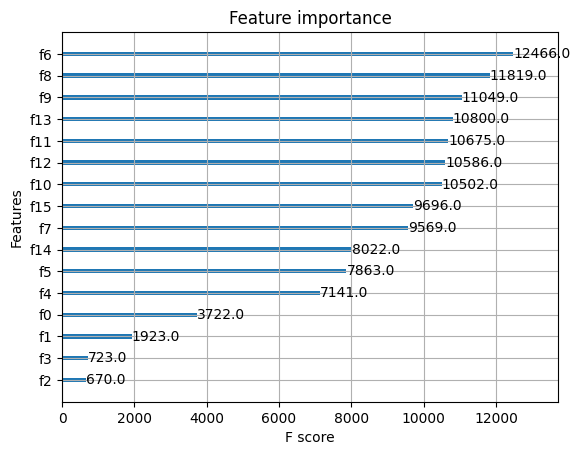

In [20]:
plot_importance(xgbm)
pyplot.show()

Training

In [21]:
y_train_pred = xgbm.predict(X_train)
predictions = [round(value) for value in y_train_pred]

In [22]:
y_train_acc = metrics.accuracy_score(y_train, y_train_pred)
y_train_pre = metrics.precision_score(y_train, y_train_pred, average='weighted')
y_train_rec = metrics.recall_score(y_train, y_train_pred, average='weighted')

In [23]:
print('XGBoost Accuracy on train dataset:', y_train_acc)
print('XGBoost Precision on train dataset:', y_train_pre)
print('XGBoost Recall on train dataset:', y_train_rec)

XGBoost Accuracy on train dataset: 1.0
XGBoost Precision on train dataset: 1.0
XGBoost Recall on train dataset: 1.0


Testing

In [24]:
y_test_preds = xgbm.predict(X_test)

In [25]:
y_test_acc = metrics.accuracy_score(y_test, y_test_preds)
y_test_pre = metrics.precision_score(y_test, y_test_preds, average='weighted')
y_test_rec = metrics.recall_score(y_test, y_test_preds, average='weighted')
y_test_cnf_matrix = metrics.confusion_matrix(y_test, y_test_preds)

In [26]:
print('XGBoost Accuracy on test dataset:', y_test_acc)
print('XGBoost Precision on test dataset:', y_test_pre)
print('XGBoost Recall on test dataset:', y_test_rec)

XGBoost Accuracy on test dataset: 0.9968907537658104
XGBoost Precision on test dataset: 0.9968900468691044
XGBoost Recall on test dataset: 0.9968907537658104


In [28]:
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20152
           1       0.99      0.99      0.99      4740
           2       1.00      1.00      1.00     18897
           3       0.99      0.99      0.99      4990
           4       1.00      1.00      1.00     17475

    accuracy                           1.00     66254
   macro avg       0.99      0.99      0.99     66254
weighted avg       1.00      1.00      1.00     66254



<AxesSubplot: title={'center': 'Confusion Matrix on Test for XGBoost'}>

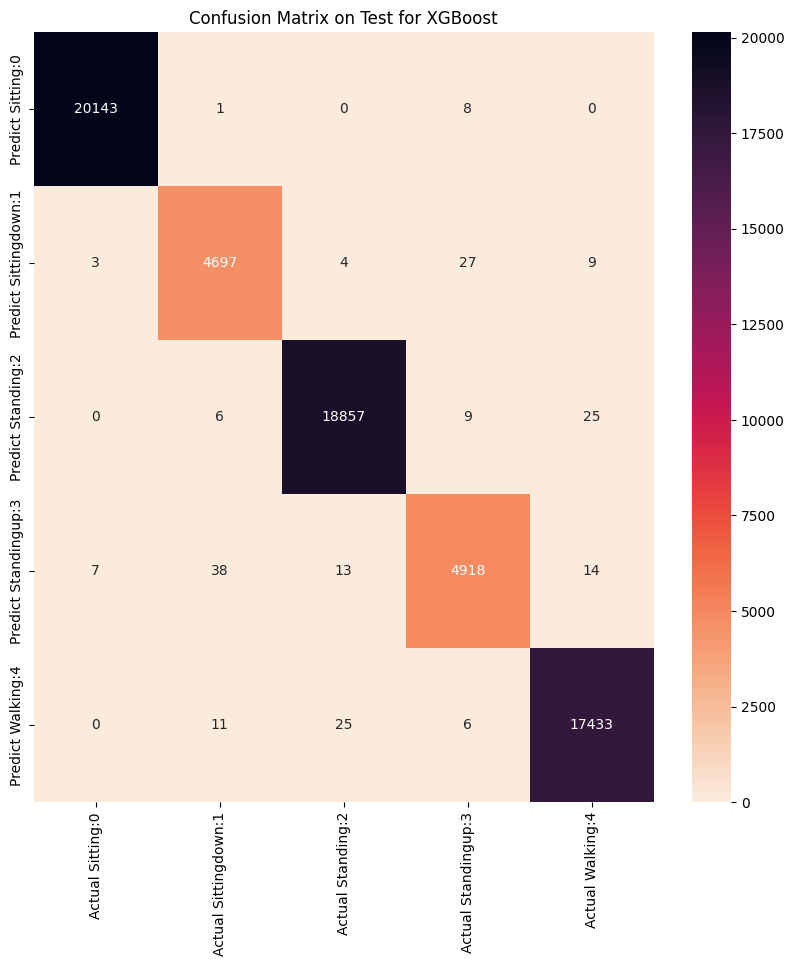

In [27]:
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix on Test for XGBoost")
cm_matrix = pd.DataFrame(data=y_test_cnf_matrix, columns=['Actual Sitting:0', 'Actual Sittingdown:1', 'Actual Standing:2', 'Actual Standingup:3', 'Actual Walking:4'], 
                                 index=['Predict Sitting:0', 'Predict Sittingdown:1', 'Predict Standing:2', 'Predict Standingup:3', 'Predict Walking:4'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rocket_r')

LGBM Boosting

In [39]:
lgb_params = {}
lgb_params['learning_rate'] = 0.05
lgb_params['boosting_type'] = 'gbdt'
lgb_params['objective'] ='multi:softmax'
lgb_params['n_estimators'] = 1000
lgb_params['num_class'] = 5

In [40]:
gbm = LGBMClassifier()
gbm.set_params(**lgb_params)
gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='logloss')

[1]	valid_0's multi_logloss: 1.29694
[2]	valid_0's multi_logloss: 1.17218
[3]	valid_0's multi_logloss: 1.06741
[4]	valid_0's multi_logloss: 0.975841
[5]	valid_0's multi_logloss: 0.896486
[6]	valid_0's multi_logloss: 0.826175
[7]	valid_0's multi_logloss: 0.762856
[8]	valid_0's multi_logloss: 0.705833
[9]	valid_0's multi_logloss: 0.654761
[10]	valid_0's multi_logloss: 0.608271
[11]	valid_0's multi_logloss: 0.566509
[12]	valid_0's multi_logloss: 0.528396
[13]	valid_0's multi_logloss: 0.493098
[14]	valid_0's multi_logloss: 0.460582
[15]	valid_0's multi_logloss: 0.430881
[16]	valid_0's multi_logloss: 0.403782
[17]	valid_0's multi_logloss: 0.379002
[18]	valid_0's multi_logloss: 0.356062
[19]	valid_0's multi_logloss: 0.334559
[20]	valid_0's multi_logloss: 0.31459
[21]	valid_0's multi_logloss: 0.296392
[22]	valid_0's multi_logloss: 0.279483
[23]	valid_0's multi_logloss: 0.263717
[24]	valid_0's multi_logloss: 0.249043
[25]	valid_0's multi_logloss: 0.235376
[26]	valid_0's multi_logloss: 0.222881

LGBMClassifier(learning_rate=0.05, n_estimators=1000, num_class=5,
               objective='multi:softmax')

Training

In [41]:
y_train_pred = gbm.predict(X_train)
predictions = [round(value) for value in y_train_pred]

In [32]:
y_train_acc = metrics.accuracy_score(y_train, y_train_pred)
y_train_pre = metrics.precision_score(y_train, y_train_pred, average='weighted')
y_train_rec = metrics.recall_score(y_train, y_train_pred, average='weighted')

In [42]:
print('LGBM Accuracy on train dataset:', y_train_acc)
print('LGBM Precision on train dataset:', y_train_pre)
print('LGBM Recall on train dataset:', y_train_rec)

LGBM Accuracy on train dataset: 1.0
LGBM Precision on train dataset: 1.0
LGBM Recall on train dataset: 1.0


Testing

In [43]:
y_test_preds = gbm.predict(X_test)

In [44]:
y_test_acc = metrics.accuracy_score(y_test, y_test_preds)
y_test_pre = metrics.precision_score(y_test, y_test_preds, average='weighted')
y_test_rec = metrics.recall_score(y_test, y_test_preds, average='weighted')
y_test_cnf_matrix = metrics.confusion_matrix(y_test, y_test_preds)

In [45]:
print('LGBM Accuracy on test dataset:', y_test_acc)
print('LGBM Precision on test dataset:', y_test_pre)
print('LGBM Recall on test dataset:', y_test_rec)

LGBM Accuracy on test dataset: 0.9974793974703414
LGBM Precision on test dataset: 0.9974782401574359
LGBM Recall on test dataset: 0.9974793974703414


In [46]:
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20152
           1       0.99      0.99      0.99      4740
           2       1.00      1.00      1.00     18897
           3       0.99      0.99      0.99      4990
           4       1.00      1.00      1.00     17475

    accuracy                           1.00     66254
   macro avg       1.00      1.00      1.00     66254
weighted avg       1.00      1.00      1.00     66254



<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

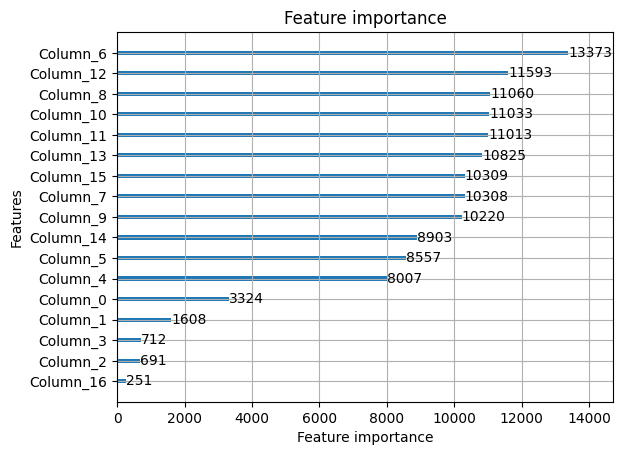

In [53]:
plot_importance(gbm)

<AxesSubplot: title={'center': 'Confusion Matrix on Test for LGBM'}>

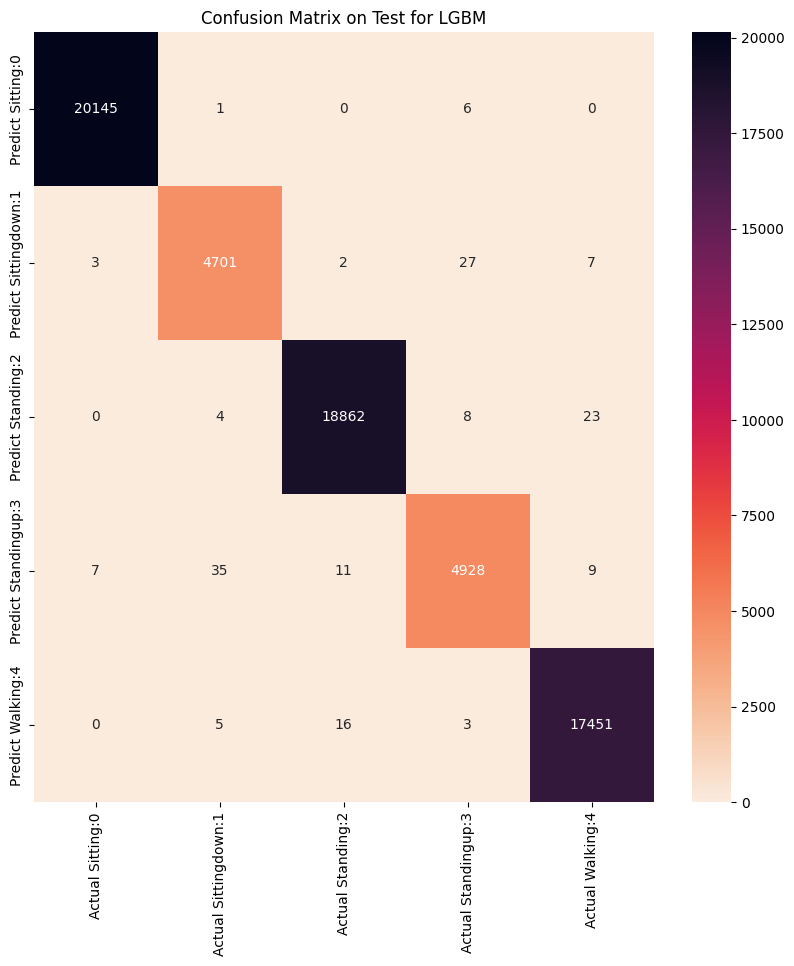

In [58]:
plt.figure(figsize=(10,10))
plt.title("Confusion Matrix on Test for LGBM")
cm_matrix = pd.DataFrame(data=y_test_cnf_matrix, columns=['Actual Sitting:0', 'Actual Sittingdown:1', 'Actual Standing:2', 'Actual Standingup:3', 'Actual Walking:4'], 
                                 index=['Predict Sitting:0', 'Predict Sittingdown:1', 'Predict Standing:2', 'Predict Standingup:3', 'Predict Walking:4'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rocket_r')